In [2]:
import os, json, glob, random, shutil, pickle, copy
from pymatgen.entries.computed_entries import ComputedStructureEntry
from pymatgen.core.structure import *
from pymatgen.core.surface import SlabGenerator, generate_all_slabs, StructureMatcher
from pymatgen.analysis.adsorption import AdsorbateSiteFinder
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
import numpy as np
import sys, glob
from matplotlib import pylab as plt
import statsmodels.api as sm 
sys.path.append('/home/jovyan/repos/nitrate/')
sys.path.append('/home/jovyan/repos/ocp/ocpmodels/datasets/')
sys.path.append('/home/jovyan/repos/mo-wulff-workflow/')
from samuel_TOF import make_tof_plot, extrapolate_tof, get_distance_TOF, select_N2, select_NH3
from other_functions import str_to_hkl
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from matplotlib import ticker
from matplotlib.ticker import FixedLocator, FormatStrFormatter
from matplotlib import patches


26 650


<INPUT>: @misc{wolfram_alpha," title = ""Wolfram Alpha"""," month = ""September"""," year = ""2013"""," url = ""http://www.wolframalpha.org""}"
<INPUT>:                    ^^^
<INPUT>: WARNING: syntax error in line 1: '}' expected
<INPUT>: @misc{wolfram_alpha," title = ""Wolfram Alpha"""," month = ""September"""," year = ""2013"""," url = ""http://www.wolframalpha.org""}"
<INPUT>:                    ^^^
<INPUT>: WARNING: syntax error in line 1: '}' expected
<INPUT>: @misc{wikipedia," title = ""Wikipedia"""," month = ""September"""," year = ""2013"""," url = ""http://en.wikipedia.org/wiki/Prices_of_elements_and_their_compounds""}"
<INPUT>:                ^^^
<INPUT>: WARNING: syntax error in line 1: '}' expected
<INPUT>: @misc{wikipedia," title = ""Wikipedia"""," month = ""September"""," year = ""2013"""," url = ""http://en.wikipedia.org/wiki/Prices_of_elements_and_their_compounds""}"
<INPUT>:                ^^^
<INPUT>: WARNING: syntax error in line 1: '}' expected
<INPUT>: @misc{wikip

In [3]:
pwd

'/home/jovyan/repos/nitrate/notebooks'

In [4]:
# What are all the materials we screened in TOTAL (Tier 0)

tier0_dict = {}
fdir = '/home/jovyan/potential_catalysts/all_bimetallics_db_screen/tier0_72761_w_gpbx_entry_ids_activity/*'
for f in glob.glob(fdir):
    els = f.split('/')[-1].replace('.json', '').split('_')
    if len(els) == 1:
        continue
    if any(el in f.split('/')[-1] for el in ['Hg', 'Cd', 'Tc', 'La']):
        continue
    entries = [d for d in json.load(open(f, 'rb'))]
    tier0_dict.update({d['entry_id']: Composition(d['composition']).reduced_formula for d in entries})
    
tier0_pairs = []
for entry_id in tier0_dict.keys():
    comp = Composition(tier0_dict[entry_id]).as_dict()
    p = tuple([c[0] for c in sorted(list(comp.items()), reverse=True, key=lambda c: c[1])])
    if p not in tier0_pairs:
        tier0_pairs.append(p)
print(len(tier0_dict), len(tier0_pairs))

59390 650


In [45]:
# tier1_dict02, tier1_pairs02 = filter_pbx_stable(list(tier0_dict.keys()), 
#                                             include_pbx_stable=False, gpbx=0.208, phrange=[4,10])
# print(len(tier1_dict02), len(tier1_pairs02))
# tier2_dict02, tier2_pairs02 = filter_active(tier1_dict02.keys(), check_existing=False)
# print(len(tier2_dict02), len(tier2_pairs02))
# tier3_dict02, tier3_pairs02, hatch_dict, entry_id_to_hatch_dict = filter_selectivity(tier2_dict02.keys(), 
#                                                                                      return_entry_id_to_hatch_dict=True)
# print(len(tier3_dict02), len(tier3_pairs02))
tier4_dict02, tier4_pairs02 = filter_cost(tier3_dict02.keys())
print(len(tier4_dict02), len(tier4_pairs02))
tier5_dict02, tier5_pairs02, final_entries = filter_ehull(tier4_dict02.keys(), max_ehull=0.108, return_entries=True)
print(len(tier5_dict02), len(tier5_pairs02))
# plt = plot_gridmap(tier1_pairs02, tier2_pairs02, tier3_pairs02,
#                    tier4_pairs02, tier5_pairs02, hatch_dict, 3)
# plt.show()
# plt.close()
# tier5_pairs

35 4
26 4


In [24]:
tier3_dict02, tier3_pairs02, hatch_dict_02 = filter_selectivity(tier2_dict02.keys(),
                                                                exclude_NH3_only=True)
print(len(tier3_dict02), len(tier3_pairs02))
tier4_dict02, tier4_pairs02 = filter_cost(tier3_dict02.keys())
print(len(tier4_dict02), len(tier4_pairs02))
tier5_dict02, tier5_pairs02 = filter_ehull(tier4_dict02.keys(), max_ehull=0.108)
print(len(tier5_dict02), len(tier5_pairs02))
print()


872 77
32 7
25 7



In [19]:
N2, NH3, both = 0, 0, 0
for entry_id in entry_id_to_hatch_dict.keys():
    if 'xx' in entry_id_to_hatch_dict[entry_id]:
        both+=1
    elif '\\\\' in entry_id_to_hatch_dict[entry_id]:
        N2+=1
        if '////' in entry_id_to_hatch_dict[entry_id]:
            NH3+=1
both, N2, NH3

(776, 96, 36)

3457 119
1073 84
872 77
32 7
25 7

6971 209
1798 142
1559 134
132 10
94 9


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:183: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))


(-0.5, 25.5) (25.5, -0.5)
(-0.5, 25.5) (-1.5, 26.5)


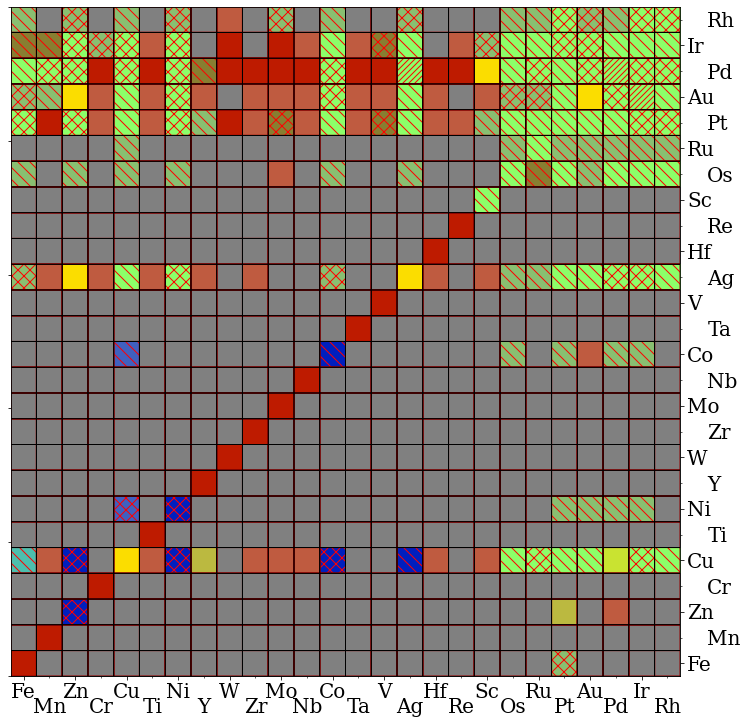

In [7]:
plt.rcParams['font.family']=['serif']

tier1_dict02, tier1_pairs02 = filter_pbx_stable(list(tier0_dict.keys()), 
                                                include_pbx_stable=False, 
                                                gpbx=0.208, phrange=[7,7])
fdir = '/home/jovyan/potential_catalysts/all_bimetallics_db_screen/tier0_72761_w_gpbx_entry_ids_activity/*'
for f in glob.glob(fdir):
    els = f.split('/')[-1].replace('.json', '').split('_')
    if len(els) == 1:
        entry_id = json.load(open(f, 'rb'))[0]['entry_id']
        tier1_pairs02.append(tuple(els))
        tier1_dict02[entry_id] = els[0]
print(len(tier1_dict02), len(tier1_pairs02))
tier2_dict02, tier2_pairs02 = filter_active(tier1_dict02.keys(), check_existing=False)
print(len(tier2_dict02), len(tier2_pairs02))
tier3_dict02, tier3_pairs02, hatch_dict_02 = filter_selectivity(tier2_dict02.keys(),
                                                                exclude_NH3_only=True)
print(len(tier3_dict02), len(tier3_pairs02))
tier4_dict02, tier4_pairs02 = filter_cost(tier3_dict02.keys())
print(len(tier4_dict02), len(tier4_pairs02))
tier5_dict02, tier5_pairs02 = filter_ehull(tier4_dict02.keys(), max_ehull=0.108)
print(len(tier5_dict02), len(tier5_pairs02))
print()

tier1_dict, tier1_pairs = filter_pbx_stable(list(tier0_dict.keys()), 
                                            include_pbx_stable=False, 
                                            gpbx=0.508, phrange=[7,7])
fdir = '/home/jovyan/potential_catalysts/all_bimetallics_db_screen/tier0_72761_w_gpbx_entry_ids_activity/*'
for f in glob.glob(fdir):
    els = f.split('/')[-1].replace('.json', '').split('_')
    if len(els) == 1:
        entry_id = json.load(open(f, 'rb'))[0]['entry_id']
        tier1_pairs.append(tuple(els))
        tier1_dict[entry_id] = els[0]
        
print(len(tier1_dict), len(tier1_pairs))
tier2_dict, tier2_pairs = filter_active(tier1_dict.keys(), check_existing=False)
print(len(tier2_dict), len(tier2_pairs))
tier3_dict, tier3_pairs, hatch_dict = filter_selectivity(tier2_dict.keys(), exclude_NH3_only=True)
print(len(tier3_dict), len(tier3_pairs))
tier4_dict, tier4_pairs = filter_cost(tier3_dict.keys())
print(len(tier4_dict), len(tier4_pairs))
tier5_dict, tier5_pairs = filter_ehull(tier4_dict.keys(), max_ehull=0.108)
print(len(tier5_dict), len(tier5_pairs))

hatch_tier_order = 3
tick_range = range(0, len(all_tms))
ellist = all_tms

costs = [costanalyzer.get_cost_per_kg(el) for el in ellist]
costs, ellist = zip(*sorted(zip(costs, ellist)))
even_ticks, odd_ticks, even_els, odd_els = [], [], [], []
for i in tick_range:
    if i %2 == 0:
        even_ticks.append(i)
        even_els.append(ellist[i])
    else:
        odd_ticks.append(i)
        odd_els.append(ellist[i])

############################################################################################
comp_grid, all_tof_dists, all_selectivity_hatches = [], [], []
for el1 in ellist:
    tof_dists, selectivity_hatches, comp_vect = [], [], []
    for el2 in ellist:

        binary = tuple([str(el1), str(el2)])
        sorted_bin = tuple(sorted(binary))

        if binary[0] == binary[1]:
            binary = (binary[0],)
#             tof_dists.append(float('nan'))
#             selectivity_hatches.append('')
#             comp_vect.append([])
#             continue

        if binary in tier1_pairs02:
            if binary in tier2_pairs02:
                if binary in tier3_pairs02:
                    if binary in tier4_pairs02:
                        if binary in tier5_pairs02:
                            # Cost
                            tof_dists.append(19)
                            selectivity_hatches.append(hatch_dict_02[tuple(binary)])
                        else:
                            # ehull
                            tof_dists.append(38)
                            if hatch_tier_order <= 4:
                                selectivity_hatches.append(hatch_dict_02[tuple(binary)])
                            else:
                                selectivity_hatches.append('')
                    else:
                        # selectivity
                        tof_dists.append(53)
                        if hatch_tier_order <= 3:
                            selectivity_hatches.append(hatch_dict_02[tuple(binary)])
                        else:
                            selectivity_hatches.append('')
                else:
                    # TOF
                    tof_dists.append(65)
                    if hatch_tier_order <= 2:
                        selectivity_hatches.append(hatch_dict_02[tuple(binary)])
                    else:
                        selectivity_hatches.append('')
            else:
                # pourbaix
                tof_dists.append(85)
                if hatch_tier_order <= 1:
                    selectivity_hatches.append(hatch_dict_02[tuple(binary)])
                else:
                    selectivity_hatches.append('')
        else:
            tof_dists.append(float('nan'))
            selectivity_hatches.append('')
    all_selectivity_hatches.append(selectivity_hatches)
    all_tof_dists.append(tof_dists)
    comp_grid.append(comp_vect)
############################################################################################
all_tof_dists_clear, all_selectivity_hatches_clear = [], []
for el1 in ellist:
    tof_dists, selectivity_hatches, comp_vect = [], [], []
    for el2 in ellist:

        binary = tuple([str(el1), str(el2)])
        sorted_bin = tuple(sorted(binary))

#         if binary[0] == binary[1]:
#             tof_dists.append(float('nan'))
#             selectivity_hatches.append('')
#             comp_vect.append([])
#             continue
        if binary[0] == binary[1]:
            binary = (binary[0],)

        if binary in tier1_pairs:
            if binary in tier2_pairs:
                if binary in tier3_pairs:
                    if binary in tier4_pairs:
                        if binary in tier5_pairs:
                            # Cost
                            tof_dists.append(19)
                            if binary not in tier2_pairs02 and binary not in tier3_pairs02:
                                selectivity_hatches.append(hatch_dict[tuple(binary)])
                            else:
                                selectivity_hatches.append('')
                        else:
                            # ehull
                            tof_dists.append(38)
                            if hatch_tier_order <= 4 and binary not in tier2_pairs02 and binary not in tier3_pairs02:
                                selectivity_hatches.append(hatch_dict[tuple(binary)])
                            else:
                                selectivity_hatches.append('')
                    else:
                        # selectivity
                        tof_dists.append(53)
                        if hatch_tier_order <= 3 and binary not in tier2_pairs02 and binary not in tier3_pairs02:
                            selectivity_hatches.append(hatch_dict[tuple(binary)])
                        else:
                            selectivity_hatches.append('')
                else:
                    # TOF
                    tof_dists.append(65)
                    if hatch_tier_order <= 2 and binary not in tier2_pairs02 and binary not in tier3_pairs02:
                        selectivity_hatches.append(hatch_dict[tuple(binary)])
                    else:
                        selectivity_hatches.append('')
            else:
                # pourbaix
                tof_dists.append(85)
                if hatch_tier_order <= 1 and binary not in tier2_pairs02 and binary not in tier3_pairs02:
                    selectivity_hatches.append(hatch_dict[tuple(binary)])
                else:
                    selectivity_hatches.append('')
        else:
            tof_dists.append(float('nan'))
            selectivity_hatches.append('')
    all_selectivity_hatches_clear.append(selectivity_hatches)
    all_tof_dists_clear.append(tof_dists)
############################################################################################

cmap = cm.jet
cmap.set_bad('grey')
fig, ax = plt.subplots()

ax.xaxis.set_major_locator(FixedLocator(range(0, 26, 2)))
ax.xaxis.set_minor_locator(FixedLocator(range(1, 26, 2)))
ax.xaxis.set_minor_formatter(FormatStrFormatter("%d"))
ax.tick_params(which='major', axis='x', labelsize=20)
ax.tick_params(which='minor', pad=20, axis='x', labelsize=20)
ax.set_xticklabels(even_els)
ax.set_xticklabels(odd_els, minor=True)

ax.set_yticklabels([])

axy = ax.twinx()
axy.yaxis.set_major_locator(FixedLocator(range(0, 26, 2)))
axy.yaxis.set_minor_locator(FixedLocator(range(1, 26, 2)))
axy.yaxis.set_minor_formatter(FormatStrFormatter("%d"))
axy.tick_params(which='major', axis='y', labelsize=20)
axy.tick_params(which='minor', pad=25, axis='y', labelsize=20)
axy.set_yticklabels(even_els)
axy.set_yticklabels(odd_els, minor=True)

# selectivity
ax = plt.gca()
all_selectivity_hatches = np.array(all_selectivity_hatches).T
comp_grid = np.array(comp_grid).T
for x, row in enumerate(all_selectivity_hatches):
    for y, hatch in enumerate(row):
        ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1, hatch=hatch,
                                       fill=False, snap=False, color='r'))
all_selectivity_hatches_clear = np.array(all_selectivity_hatches_clear).T
for x, row in enumerate(all_selectivity_hatches_clear):
    for y, hatch in enumerate(row):
        ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1, hatch=hatch,
                                       fill=False, snap=False, color='r'))

im = plt.imshow(all_tof_dists, cmap='jet', interpolation='nearest')
im = plt.imshow(all_tof_dists_clear, cmap='jet', interpolation='nearest', alpha=0.5)

fig.set_size_inches(12, 12.3)
for x, row in enumerate(all_tof_dists):
    for y, hatch in enumerate(row):
        ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1, 
                                       fill=False, snap=False, color='k'))
plt.clim(0,100)
# plt.plot([-1.5, 29], [-1.5, 29], 'k-', linewidth=3, )
print(plt.xlim(), plt.ylim())
plt.xlim(-0.5,25.5)
plt.ylim(-1.5, 26.5)
print(plt.xlim(), plt.ylim())

plt.savefig('2d_screen_compromise.pdf')
# plt.show()
# plt.close()